In [13]:
# Pridicting RPower Prices
### EDA SECTION

In [14]:
import pandas as pd
df = pd.read_csv('data/rpower_nse.csv')

In [15]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4036 entries, 0 to 4035
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4036 non-null   object 
 1   Open       4029 non-null   float64
 2   High       4029 non-null   float64
 3   Low        4029 non-null   float64
 4   Close      4029 non-null   float64
 5   Adj Close  4029 non-null   float64
 6   Volume     4029 non-null   float64
dtypes: float64(6), object(1)
memory usage: 220.8+ KB


In [16]:
# remove null values
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [17]:
df = df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

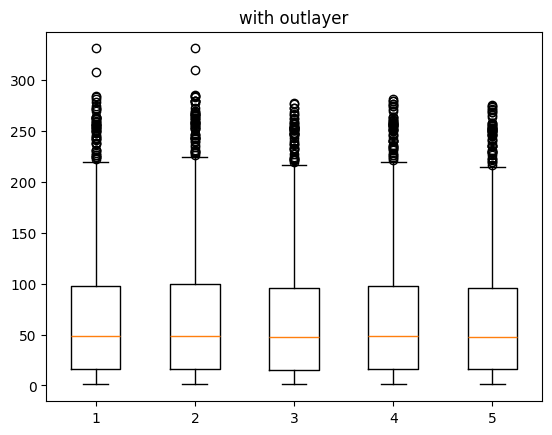

In [18]:
# remove outlayer
import matplotlib.pyplot as plt

column_list = df.columns[1:6]
plt.boxplot(df[column_list])
plt.title('with outlayer')
plt.show()

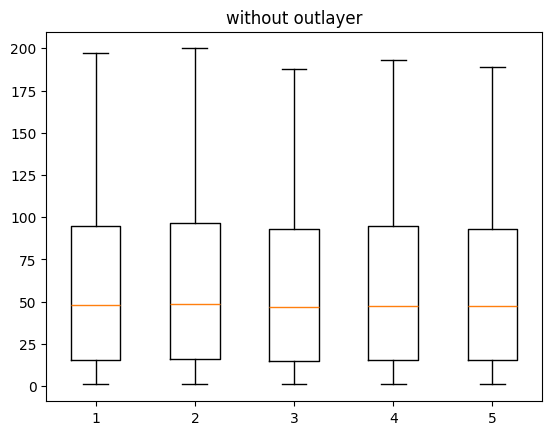

In [19]:
for column in column_list:
    df = df[(df[column]<=200)&(df[column]>=1)]
    
column_list = df.columns[1:6]
plt.boxplot(df[column_list])
plt.title('without outlayer')
plt.show()

In [20]:
# test train split (ratio: 80% -20%)
from sklearn.model_selection import train_test_split

x = df[['Open', 'High', 'Low', 'Adj Close']]
y = df['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((3158, 4), (790, 4))

In [21]:
# use LinearRegression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
model_coef = model.coef_
model_intercept = model.intercept_
print(f'coef: {model_coef} and intercept: {model_intercept}')

coef: [-0.08362014  0.11633019  0.11078056  0.8761141 ] and intercept: -0.346014281341148


In [23]:
predicted = model.predict(x_test)
predicted.shape

(790,)

In [24]:
# model accuracy is (0.99%)
accuracy_score = model.score(x_test, y_test)
print(f'accuracy_score: {accuracy_score}')

# model other accuracy test 
import math
from sklearn import metrics
print('Mean Squared Error:',metrics.mean_squared_error(y_test, predicted))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, predicted))
print('Mean Square Root Error:',math.sqrt(metrics.mean_squared_error(y_test, predicted)))

accuracy_score: 0.9999645553285698
Mean Squared Error: 0.09371009554476636
Mean Absolute Error: 0.23798272989515687
Mean Square Root Error: 0.3061210472097049


In [25]:
# model difrence Actual vs Predicted
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df_compare.head(10)

,Actual,Predicted
3224,4.700000,4.439231
2206,43.500000,44.043433
1899,50.500000,50.237287
148,157.149994,157.108792
2697,30.250000,30.566237
3577,13.300000,13.218768
1782,55.700001,55.576699
3397,13.500000,13.426749
351,168.649994,168.646913
1356,67.000000,67.040765


In [26]:
predicted = model.predict(x)
count_y = y.shape
count_predicted = predicted.shape
print(f'count of values in predicted colums: {count_predicted} and y colums: {count_y}\n')
print(f'predicted colums: {predicted}')

count of values in predicted colums: (3948,) and y colums: (3948,)

predicted colums: [185.08706994 182.77748809 182.59946268 ...  31.07711357  30.98858519
  30.1702569 ]


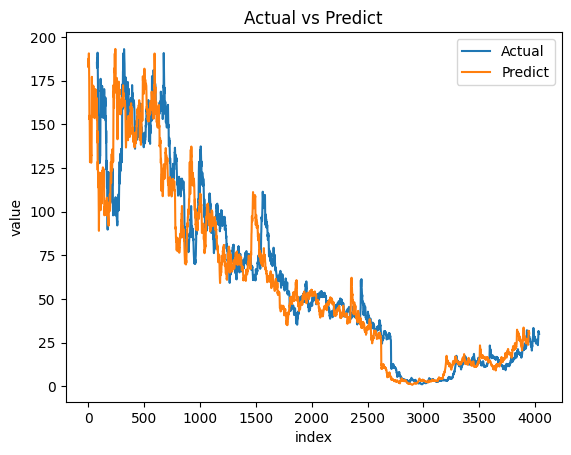

In [27]:
# create graph for review model
plt.plot(y, label='Actual')
plt.plot(predicted, label='Predict')
plt.xlabel('index')
plt.ylabel('value')
plt.title('Actual vs Predict')
plt.legend()
plt.show()